In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Better way to loop through files

In [5]:
def extract_data(sim_file, n_files=100, shift=False):
    eff_total_mix = {}
    eff_total_events = {}
    n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

    for i in n_systems:
        eff_single_mix = []
        eff_single_event = []
        for j in range(1, n_files+1):
            eff_df = pd.read_csv(f"../../data/{sim_file}/{str(i)}/ecmc_ff_sf_10m-{str(i)}-{str(j)}.csv")

            if shift:
                eff_df["events"] = eff_df['events'].shift(1)
                eff_df["events"][0] = 0
                
            eff_single_mix.append(eff_df["var_mix"].to_list())
            eff_single_event.append(eff_df["events"].to_list())
        eff_single_mix = np.mean(eff_single_mix, axis=0)
        eff_single_event = np.mean(eff_single_event, axis=0)

        eff_total_mix[i] = eff_single_mix
        eff_total_events[i] = eff_single_event
    
    return eff_total_mix, eff_total_events

def create_baseline(events):
    x_baseline = {}
    for i in n_systems:
        x_baseline[i] = np.cumsum(events[i])/i

    return x_baseline

def calculate_var_equil():
    n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    var_equil = {}

    for i in n_systems:
        diameter = 400/(2*i)
        L_free = (400 - i * diameter)

        var_equil[i] = (i**2*(L_free/i)**2)/(4 * (i+1))
    return var_equil

# var_equil_8 = calculate_var_equil(8)
# var_equil_16 = calculate_var_equil(16)
# var_equil_32 = calculate_var_equil(32)
# var_equil_64 = calculate_var_equil(64)
# var_equil_128 = calculate_var_equil(128)
# var_equil_256 = calculate_var_equil(256)
# var_equil_512 = calculate_var_equil(512)
# var_equil_1024 = calculate_var_equil(1024)
# var_equil_2048 = calculate_var_equil(2048)
var_equil = calculate_var_equil()

### MEANIFIED system sizes 

#### Classical FF

In [6]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_baseline_mix, eff_baseline_events = extract_data("var_runs_400", n_files=500, shift=True)

eff_x_baseline = create_baseline(eff_baseline_events)

#### Accelerated FF (was fast, but actually wrong bc of events)

In [7]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_acc_mix, eff_acc_events = extract_data("acc_runs", shift=True)

eff_acc_x_baseline = create_baseline(eff_acc_events)


#### Accelerated FF 1 sweep h_i

In [65]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_acc_2nh_nl4s_mix, eff_acc_2nh_nl4s_events = extract_data("acc_runs_2nh_nl4s")
eff_acc_2nh_nl4s_x = create_baseline(eff_acc_2nh_nl4s_events)

eff_acc_3nh_nl4s_mix, eff_acc_3nh_nl4s_events = extract_data("acc_runs_3nh_nl4s")
eff_acc_3nh_nl4s_x = create_baseline(eff_acc_3nh_nl4s_events)

eff_acc_4nh_nl4s_mix, eff_acc_4nh_nl4s_events = extract_data("acc_runs_4nh_nl4s")
eff_acc_4nh_nl4s_x = create_baseline(eff_acc_4nh_nl4s_events)

eff_acc_5nh_nl4s_mix, eff_acc_5nh_nl4s_events = extract_data("acc_runs_5nh_nl4s")
eff_acc_5nh_nl4s_x = create_baseline(eff_acc_5nh_nl4s_events)

eff_acc_10nh_nl4s_mix, eff_acc_10nh_nl4s_events = extract_data("acc_runs_10nh_nl4s")
eff_acc_10nh_nl4s_x = create_baseline(eff_acc_10nh_nl4s_events)

eff_acc_20nh_nl4s_mix, eff_acc_20nh_nl4s_events = extract_data("acc_runs_20nh_nl4s")
eff_acc_20nh_nl4s_x = create_baseline(eff_acc_20nh_nl4s_events)


In [66]:
eff_acc_2n1s_mix, eff_acc_2n1s_events = extract_data("acc_runs_2h1s")
eff_acc_2n1s_x = create_baseline(eff_acc_2n1s_events)

eff_acc_3n1s_mix, eff_acc_3n1s_events = extract_data("acc_runs_3h1s")
eff_acc_3n1s_x = create_baseline(eff_acc_3n1s_events)

eff_acc_4n1s_mix, eff_acc_4n1s_events = extract_data("acc_runs_4h1s")
eff_acc_4n1s_x = create_baseline(eff_acc_4n1s_events)

eff_acc_5n1s_mix, eff_acc_5n1s_events = extract_data("acc_runs_5h1s")
eff_acc_5n1s_x = create_baseline(eff_acc_5n1s_events)

#### Mixing time plots

(0.0, 2.0)

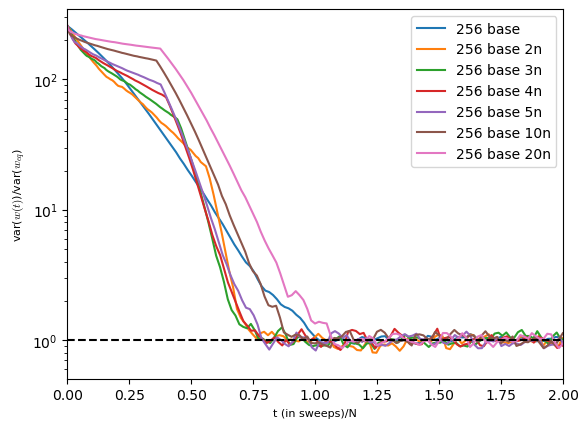

In [85]:
fig, ax = plt.subplots(1)

# ax.plot(eff_x_baseline[8][:1000]/8, (eff_baseline_mix[8][:1000]/var_equil[8]), label="N = 8")
# ax.plot(eff_x_baseline[16][:2000]/16, ((eff_baseline_mix[16])[:2000]/var_equil[16]), label="16")
# ax.plot(eff_x_baseline[32][:2000]/32, ((eff_baseline_mix[32])[:2000]/var_equil[32]), label="32")
# ax.plot(eff_x_baseline[64][:2000]/64, (eff_baseline_mix[64][:2000]/var_equil[64]), label="64")
# ax.plot(eff_x_baseline[128][:10000]/128, (eff_baseline_mix[128][:10000]/var_equil[128]), label="128")
# ax.plot(eff_x_baseline[256][:5000]/256, (eff_baseline_mix[256][:5000]/var_equil[256]), label="256")
# ax.plot(eff_x_baseline[512][:10000]/512, (eff_baseline_mix[512][:10000]/var_equil[512]), label="512")
# ax.plot(eff_x_baseline[1024][:30000]/1024, (eff_baseline_mix[1024][:30000]/var_equil[1024]), label="1024")
# ax.plot(eff_x_baseline[2048][:30000]/2048, (eff_baseline_mix[2048][:30000]/var_equil[2048]), label="2048")

# ax.plot(eff_acc_2n1s_x[8][:1000]/8, (eff_acc_2n1s_mix[8][:1000]/var_equil[8),] label="8 acc")
# ax.plot(eff_acc_2n1s_x[16][:2000]/16, (eff_acc_2n1s_mix[16][:2000]/var_equil[16]), label="16 acc")
# ax.plot(eff_acc_2n1s_x[32][:2000]/32, (eff_acc_2n1s_mix[32][:2000]/var_equil[32]), label="32 acc")
# ax.plot(eff_acc_2n1s_x[64][:2000]/64, (eff_acc_2n1s_mix[64][:2000]/var_equil[64]), label="64 acc")
# ax.plot(eff_acc_2n1s_x[128][:10000]/128, (eff_acc_2n1s_mix[128][:10000]/var_equil[128]), label="128 acc")
# ax.plot(eff_acc_2n1s_x[256][:5000]/256, (eff_acc_2n1s_mix[256][:5000]/var_equil[256]), label="256 acc")
# ax.plot(eff_acc_2n1s_x[512][:10000]/512, (eff_acc_2n1s_mix[512][:10000]/var_equil[512]), label="512 acc")
# ax.plot(eff_acc_2n1s_x[1024][:30000]/1024, (eff_acc_2n1s_mix[1024][:30000]/var_equil[1024]), label="1024 acc", marker=".")
# ax.plot(eff_acc_2n1s_x[2048][:30000]/2048, (eff_acc_2n1s_mix[2048][:30000]/var_equil[2048]), label="2048 acc")

# ax.plot(eff_acc_2nh_nl4s_x[8][:1000]/8, (eff_acc_2nh_nl4s_mix[8][:1000]/var_equil[8]), label="8 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[16][:2000]/16, (eff_acc_2nh_nl4s_mix[16][:2000]/var_equil[16]), label="16 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[32][:2000]/32, (eff_acc_2nh_nl4s_mix[32][:2000]/var_equil[32]), label="32 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[64][:2000]/64, (eff_acc_2nh_nl4s_mix[64][:2000]/var_equil[64]), label="64 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[128][:10000]/128, (eff_acc_2nh_nl4s_mix[128][:10000]/var_equil[128]), label="128 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[256][:5000]/256, (eff_acc_2nh_nl4s_mix[256][:5000]/var_equil[256]), label="256 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[512][:10000]/512, (eff_acc_2nh_nl4s_mix[512][:10000]/var_equil[512]), label="512 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[1024][:30000]/1024, (eff_acc_2nh_nl4s_mix[1024][:30000]/var_equil[1024]), label="1024 acc 2n")
# ax.plot(eff_acc_2nh_nl4s_x[2048][:30000]/2048, (eff_acc_2nh_nl4s_mix[2048][:30000]/var_equil[2048]), label="2048 acc 2n")

# ax.plot(eff_acc_3nh_nl4s_x[8][:1000]/8, (eff_acc_3nh_nl4s_mix[8][:1000]/var_equil[8]), label="8 acc 3n")
# ax.plot(eff_acc_3nh_nl4s_x[16][:2000]/16, (eff_acc_3nh_nl4s_mix[16][:2000]/var_equil[16]), label="16 acc 3n")
# ax.plot(eff_acc_3nh_nl4s_x[32][:2000]/32, (eff_acc_3nh_nl4s_mix[32][:2000]/var_equil[32]), label="32 acc 3n")
# ax.plot(eff_acc_3nh_nl4s_x[64][:2000]/64, (eff_acc_3nh_nl4s_mix[64][:2000]/var_equil[64]), label="64 acc 3n", marker='.')
# ax.plot(eff_acc_3nh_nl4s_x[128][:10000]/128, (eff_acc_3nh_nl4s_mix[128][:10000]/var_equil[128]), label="128 acc 3n")
# ax.plot(eff_acc_3nh_nl4s_x[256][:5000]/256, (eff_acc_3nh_nl4s_mix[256][:5000]/var_equil[256]), label="256 acc 3n")
# ax.plot(eff_acc_3nh_nl4s_x[512][:10000]/512, (eff_acc_3nh_nl4s_mix[512][:10000]/var_equil[512]), label="512 acc 3n")
# ax.plot(eff_acc_3nh_nl4s_x[1024][:30000]/1024, (eff_acc_3nh_nl4s_mix[1024][:30000]/var_equil[1024]), label="1024 acc 3n", marker=".")
# ax.plot(eff_acc_3nh_nl4s_x[2048][:30000]/2048, (eff_acc_3nh_nl4s_mix[2048][:30000]/var_equil[2048]), label="2048 acc 3n")

display_n = [256]
for i in display_n:
    ax.plot(eff_x_baseline[i][:30000]/i, eff_baseline_mix[i][:30000]/var_equil[i], label=f"{i} base")

    # ax.plot(eff_acc_2n1s_x[i][:30000]/i, eff_acc_2n1s_mix[i][:30000]/var_equil[i], label=f"{i} acc 2n1s")
    # ax.plot(eff_acc_3n1s_x[i][:30000]/i, eff_acc_3n1s_mix[i][:30000]/var_equil[i], label=f"{i} acc 3n1s")
    # ax.plot(eff_acc_4n1s_x[i][:30000]/i, eff_acc_4n1s_mix[i][:30000]/var_equil[i], label=f"{i} acc 4n1s")
    # ax.plot(eff_acc_5n1s_x[i][:30000]/i, eff_acc_5n1s_mix[i][:30000]/var_equil[i], label=f"{i} acc 5n1s")

    ax.plot(eff_acc_2nh_nl4s_x[i][:30000]/i, eff_acc_2nh_nl4s_mix[i][:30000]/var_equil[i], label=f"{i} base 2n")
    ax.plot(eff_acc_3nh_nl4s_x[i][:30000]/i, eff_acc_3nh_nl4s_mix[i][:30000]/var_equil[i], label=f"{i} base 3n")
    ax.plot(eff_acc_4nh_nl4s_x[i][:30000]/i, eff_acc_4nh_nl4s_mix[i][:30000]/var_equil[i], label=f"{i} base 4n")
    ax.plot(eff_acc_5nh_nl4s_x[i][:30000]/i, eff_acc_5nh_nl4s_mix[i][:30000]/var_equil[i], label=f"{i} base 5n")
    ax.plot(eff_acc_10nh_nl4s_x[i][:30000]/i, eff_acc_10nh_nl4s_mix[i][:30000]/var_equil[i], label=f"{i} base 10n")
    ax.plot(eff_acc_20nh_nl4s_x[i][:30000]/i, eff_acc_20nh_nl4s_mix[i][:30000]/var_equil[i], label=f"{i} base 20n")


# plt.vlines(0.75, 0, 10)
# plt.vlines(1, 0, 10)
plt.hlines(1, 0, 2, colors="black", linestyles='dashed')
plt.rcParams['mathtext.fontset'] = 'cm'

ax.set_ylabel(r"var($w(t)$)/var($w_{eq}$)", fontsize="8")
ax.set_xlabel("t (in sweeps)/N", fontsize="8")
ax.legend()
ax.set_yscale('log')
ax.set_xlim(0, 2)


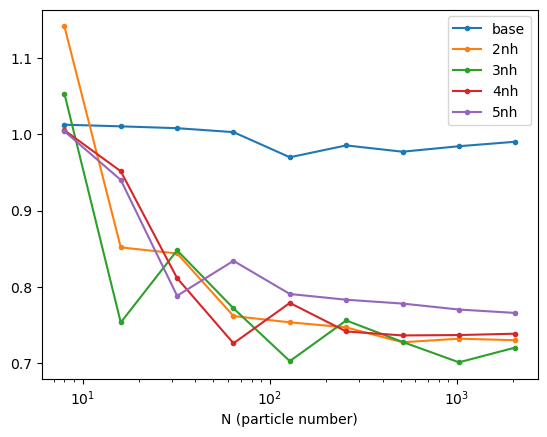

In [83]:
def find_mixed_time(mix, x):
    mixed_time = []
    for n in n_systems:
        for idx, var in enumerate(mix[n]):
            if var/var_equil[n] > 0.85 and var/var_equil[n] < 1.20:
                mixed_time.append(x[n][idx]/n)
                #print(idx)
                #print(eff_acc_2n1s_mix[n][idx]/n)
                break
    return mixed_time

mixed_time_base = find_mixed_time(eff_baseline_mix, eff_x_baseline)
mixed_time_acc = find_mixed_time(eff_acc_mix, eff_acc_x_baseline)
mixed_time_acc_2n1s = find_mixed_time(eff_acc_2n1s_mix, eff_acc_2n1s_x)
mixed_time_acc_3n1s = find_mixed_time(eff_acc_3n1s_mix, eff_acc_3n1s_x)
mixed_time_acc_4n1s = find_mixed_time(eff_acc_4n1s_mix, eff_acc_4n1s_x)
mixed_time_acc_5n1s = find_mixed_time(eff_acc_5n1s_mix, eff_acc_5n1s_x)

mixed_time_acc_2nh_nl4s = find_mixed_time(eff_acc_2nh_nl4s_mix, eff_acc_2nh_nl4s_x)
mixed_time_acc_3nh_nl4s = find_mixed_time(eff_acc_3nh_nl4s_mix, eff_acc_3nh_nl4s_x)
mixed_time_acc_4nh_nl4s = find_mixed_time(eff_acc_4nh_nl4s_mix, eff_acc_4nh_nl4s_x)
mixed_time_acc_5nh_nl4s = find_mixed_time(eff_acc_5nh_nl4s_mix, eff_acc_5nh_nl4s_x)

plt.plot(n_systems, mixed_time_base, marker='.', label="base")
# plt.plot(n_systems, mixed_time_acc , marker='.', label='sim base')
# plt.plot(n_systems, mixed_time_acc_2n1s, marker='.', label='2n1s')
# plt.plot(n_systems, mixed_time_acc_3n1s, marker='.', label='3n1s')
# plt.plot(n_systems, mixed_time_acc_4n1s, marker='.', label='4n1s')
# plt.plot(n_systems, mixed_time_acc_5n1s, marker='.', label='5n1s')

plt.plot(n_systems, mixed_time_acc_2nh_nl4s, marker='.', label='2nh')
plt.plot(n_systems, mixed_time_acc_3nh_nl4s, marker='.', label='3nh')
plt.plot(n_systems, mixed_time_acc_4nh_nl4s, marker='.', label='4nh')
plt.plot(n_systems, mixed_time_acc_5nh_nl4s, marker='.', label='5nh')


plt.xscale('log')
plt.xlabel("N (particle number)")
plt.legend()
